In [62]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
#import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import matplotlib.patches as patches
import os
import cartopy.mpl.ticker as cticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import re
import matplotlib.colors as mcolors
import datetime

In [3]:
#data import
ds_era = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/era5/2021.h5')
ds_era

<xarray.Dataset>
Dimensions:  (phony_dim_0: 1460, phony_dim_1: 20, phony_dim_2: 721,
              phony_dim_3: 1440)
Dimensions without coordinates: phony_dim_0, phony_dim_1, phony_dim_2,
                                phony_dim_3
Data variables:
    fields   (phony_dim_0, phony_dim_1, phony_dim_2, phony_dim_3) float32 ...

Text(0, 0.5, 'Latitude')

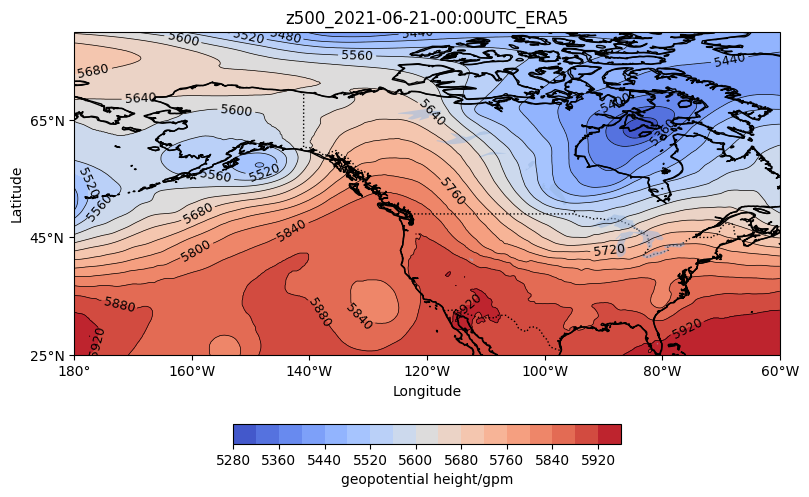

In [37]:

#ERA5 plots- narrower view 

#lat = ds_fcn_21['phony_dim_4']
#lon = ds_fcn_21['phony_dim_5']

#lat= ds_era['phony_dim_2']
#lon= ds_era['phony_dim_3']
#phony_dim_2(260,40,-1)
#pholat= ds_era['phony_dim_2'][260:40:-1]ny_dim_3= slice(720,1200)

#ds_era.fields

#ds_era_tr = ds_era.transpose('phony_dim_0','phony_dim_1','phony_dim_3','phony_dim_2')

#lat= ds_era['phony_dim_2']
#lon= ds_era['phony_dim_3'][720:1200]

lat = np.linspace(25, 80, 220)
lon = np.linspace(-180, -60, 480)
lon_grid, lat_grid = np.meshgrid(lon, lat)


ds_era_z500 = ds_era.fields[684,14,260:40:-1,720:1200]



# Set the CARTOPY_USER_BACKGROUNDS environment variable
#os.environ['CARTOPY_USER_BACKGROUNDS'] = '/home/kit/imk-tro/gj5173/'

# Assuming you have latitude ('lat'), longitude ('lon'), and temperature ('temperature') variables

# Create a figure and axis with Cartopy projection
fig = plt.figure(figsize=(10,6))
#proj = ccrs.PlateCarree(central_longitude=-120)
#ax = fig.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
ax = plt.axes(projection=ccrs.PlateCarree())
#proj = ccrs.PlateCarree(central_longitude=-120) 


# Set up the map projection
#projection = 'merc'  # Choose the desired projection
#fig, ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree() })

# Convert coordinates to map projection
x, y = lon_grid, lat_grid  # Replace with the appropriate transformation method






leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent

#f2_ax1 = fig.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
ax.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
                  


# Add map 
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='w')


ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())

lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

# Plot the contour map
#contour = ax.contourf(lon,lat,ds_era.fields[656,2,260:40:-1,720:1200],cmap='jet',levels=20)
contour = ax.contour(x,y,ds_era_z500/9.80665, levels=20, colors='k', linewidths=0.5)
plt.clabel(contour, inline=1, fontsize=9) 
contour3 = ax.contourf(x,y,ds_era_z500/9.80665,cmap='coolwarm',levels=20)
#mark the location of lytton
#red_point_lon = -121.50
#red_point_lat = 50.25
#ax.plot(red_point_lon, red_point_lat, 'r*', markersize=10)
# Add colorbar
#plt.colorbar()
cbar = plt.colorbar(contour3, ax=ax, label='geopotential height/gpm',orientation='horizontal',shrink=0.5)


# Set plot title and labels
plt.title('z500_2021-06-21-00:00UTC_ERA5')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

#plt.savefig('Z500_2021-06-14_ERA5.png', bbox_inches='tight',dpi=100)

#656:2021.06.14 00UTC -06.29 00UTC

# Show the plot
#plt.show()

In [38]:
#ECMWF
directory = '/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/'
filename_pattern = r'fc_cf_\d{8}_\d{2}_pl\.nc'

files = sorted([f for f in os.listdir(directory) if re.match(filename_pattern, f)])
files

data_ec = []
for file in files:
    file_path = os.path.join(directory, file)
    # Extract the date from the filename
    #date_str = re.search(r'\d{8}_\d{2}', file).group(0)
    #date = datetime.datetime.strptime(date_str, '%Y%m%d_%H').date()
    # Read the file and extract the desired variable
    ds = xr.open_dataset(file_path)
    variable_data = ds['z'][:,2,:,:]

    #time_coord = xr.DataArray([date], dims='time1', coords={'time1': [date]})
    #variable_data = variable_data.expand_dims(dim='time1')
    #variable_data = variable_data.assign_coords(time=time_coord)

    data_ec.append(variable_data)

#combined_data = xr.concat(data, dim='time1')
#combined_data
#combined_data[0,:,119,234]
np.shape(data_ec)

#ds_ecmwf.t2m[0,79:159,194:274]
data_array_ec =xr.DataArray(data_ec)
#data_array_ec[:,0,0,0]
#mean_ecmwf = np.mean(data_array_ec[:,:,79:159,194:274], axis=(-2, -1))
#mean_ecmwf
data_array_ec

<xarray.DataArray (dim_0: 21, dim_1: 57, dim_2: 221, dim_3: 481)>
array([[[[52982.156, 52990.156, 52998.03 , ..., 53253.78 , 53252.78 ,
          53251.656],
         [53020.28 , 53027.656, 53034.906, ..., 53276.28 , 53274.28 ,
          53272.53 ],
         [53058.03 , 53064.906, 53071.656, ..., 53301.656, 53299.156,
          53296.78 ],
         ...,
         [57692.78 , 57691.656, 57690.03 , ..., 57932.406, 57932.28 ,
          57933.03 ],
         [57691.156, 57691.28 , 57689.28 , ..., 57935.156, 57934.78 ,
          57935.53 ],
         [57688.53 , 57689.28 , 57688.156, ..., 57938.53 , 57937.656,
          57937.656]],

        [[52900.62 , 52902.37 , 52904.12 , ..., 53279.62 , 53277.37 ,
          53275.12 ],
         [52946.37 , 52947.62 , 52948.746, ..., 53265.12 , 53263.246,
          53261.62 ],
         [52992.246, 52993.246, 52994.12 , ..., 53254.496, 53253.12 ,
          53251.746],
...
         [57542.594, 57543.844, 57544.47 , ..., 57860.22 , 57858.344,
          57856.72 ],
         [57541.72 , 57542.72 , 57542.844, ..., 57869.844, 57868.97 ,
          57868.47 ],
         [57542.22 , 57541.47 , 57540.97 , ..., 57879.97 , 57879.47 ,
          57879.594]],

        [[53292.23 , 53284.98 , 53277.605, ..., 52687.48 , 52695.855,
          52704.105],
         [53306.98 , 53298.73 , 53290.355, ..., 52726.73 , 52735.48 ,
          52744.105],
         [53322.355, 53313.105, 53303.855, ..., 52770.48 , 52778.73 ,
          52786.98 ],
         ...,
         [57661.105, 57656.98 , 57653.48 , ..., 57886.48 , 57885.105,
          57883.855],
         [57659.73 , 57656.105, 57652.605, ..., 57894.23 , 57893.73 ,
          57893.105],
         [57657.855, 57655.855, 57652.855, ..., 57902.48 , 57902.98 ,
          57903.23 ]]]], dtype=float32)
Dimensions without coordinates: dim_0, dim_1, dim_2, dim_3

In [39]:
ds_ecmwf = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_cf_20210629_00_pl.nc')

Text(0, 0.5, 'Latitude')

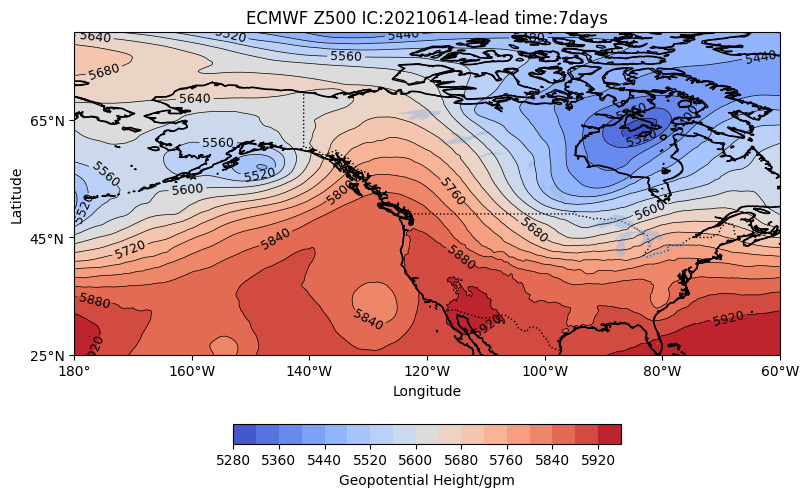

In [46]:
#ecmwf plots 

# Set the CARTOPY_USER_BACKGROUNDS environment variable
#os.environ['CARTOPY_USER_BACKGROUNDS'] = '/home/kit/imk-tro/gj5173/'

# Assuming you have latitude ('lat'), longitude ('lon'), and temperature ('temperature') variables

# Create a figure and axis with Cartopy projection
fig3 = plt.figure(figsize=(10,6))
#proj = ccrs.PlateCarree(central_longitude=-120)
#ax1 = fig2.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
ax3 = plt.axes(projection=ccrs.PlateCarree())
#proj = ccrs.PlateCarree(central_longitude=-120) 

leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent

#f2_ax1 = fig.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
ax3.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
lon_ec = ds_ecmwf['longitude']
lat_ec = ds_ecmwf['latitude']


                  
# Add map features
ax3.add_feature(cfeature.COASTLINE)
ax3.add_feature(cfeature.BORDERS, linestyle=':')
ax3.add_feature(cfeature.LAND, facecolor='lightgray')
ax3.add_feature(cfeature.OCEAN, facecolor='w')


ax3.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax3.add_feature(cfeature.LAKES, alpha=0.5)
ax3.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
ax3.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())

lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()

ax3.xaxis.set_major_formatter(lon_formatter)
ax3.yaxis.set_major_formatter(lat_formatter)

# Plot the contour map
#contour = ax.contourf(lon,lat,ds_era.fields[676,2,260:40:-1,720:1200],cmap='jet',levels=20)
#phony_dim_4-lat phony_dim_5-lon phony_dim_0-leadtime(21) phony_dim_2-time 57(0:ground truth,intervel:6h,start from 2021.06.14 00UTC,) phony_dim_1-pertubated members phony_dim_3:variables
#assume time intervel in lead time is 3h
#lead time: 18 36 54 72
#time 2021.06.14-07.04UTC 00:00

#control forecast
contour = ax3.contour(lon_ec,lat_ec,data_array_ec[7,0,:,:]/9.80665, levels=20, colors='k', linewidths=0.5)
plt.clabel(contour, inline=1, fontsize=9) 
contour3 = ax3.contourf(lon_ec,lat_ec,data_array_ec[7,0,:,:]/9.80665,cmap='coolwarm',levels=20)
#ds_fcn_ecmwf.isel(phony_dim_0 = 1, phony_dim_1 = 1,phony_dim_2 = 2,phony_dim_3=slice(None,None,-1)).forecast.plot()
#control forecast

# Add colorbar
cbar = plt.colorbar(contour3, ax=ax3, label='Geopotential Height/gpm',orientation='horizontal',shrink=0.5)

# Set plot title and labels
#plt.title('Temperature Contour Map')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
#cbar = plt.colorbar(contour, ax=ax1, label='Temperature/K',orientation='horizontal',shrink=0.5)
plt.title('ECMWF Z500 IC:20210614-lead time:7days')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

#plt.savefig('/home/kit/imk-tro/gj5173/z500_era5/Z500_2021-06-26_ECMWF.png', bbox_inches='tight',dpi=100)
# Show the plot
#plt.show

In [7]:
np.shape(ds_era.fields[698,14,260:40:-1,720:1200])

(220, 480)

In [47]:
np.shape(data_array_ec[0,28,221:0:-1,0:480])

(220, 480)

In [90]:
#use smaller batches to calculate the difference(cuz direct calculation is not possible)
variable1 = ds_era.fields[684,14,260:40:-1,720:1200].values
variable2 = data_array_ec[7,0,221:0:-1,0:480].values


batch_size = 50  # Set the desired batch size

# Process data in smaller batches using a loop

difference = np.empty((220, 480))
for i in range(0, 220, batch_size):
    for j in range(0, 480, batch_size):
        batch_variable1 = variable1[i:i + batch_size, j:j + batch_size]
        batch_variable2 = variable2[i:i + batch_size, j:j + batch_size]
        
        # Calculate the difference point by point for the current batch
        batch_difference = batch_variable1 - batch_variable2
        
        # Update the difference array with the current batch_difference
        difference[i:i + batch_size, j:j + batch_size] = batch_difference

In [91]:
difference

array([[-18.6328125 , -18.390625  , -18.40234375, ..., -10.3125    ,
         -7.8046875 ,  -9.4296875 ],
       [-16.609375  , -16.12109375, -15.2578125 , ..., -10.44140625,
         -9.56640625,  -5.1875    ],
       [ -9.08203125, -10.09765625,  -7.734375  , ..., -12.07421875,
        -10.44921875,  -4.56640625],
       ...,
       [ 15.53515625,  14.7734375 ,  17.26953125, ..., -12.4765625 ,
        -10.1015625 , -10.98046875],
       [ 13.40625   ,  16.02734375,  15.390625  , ..., -16.0078125 ,
        -16.265625  , -16.51953125],
       [ 10.390625  ,  12.63671875,  11.875     , ..., -18.43359375,
        -18.8125    , -15.8125    ]])

Text(0, 0.5, 'Latitude')

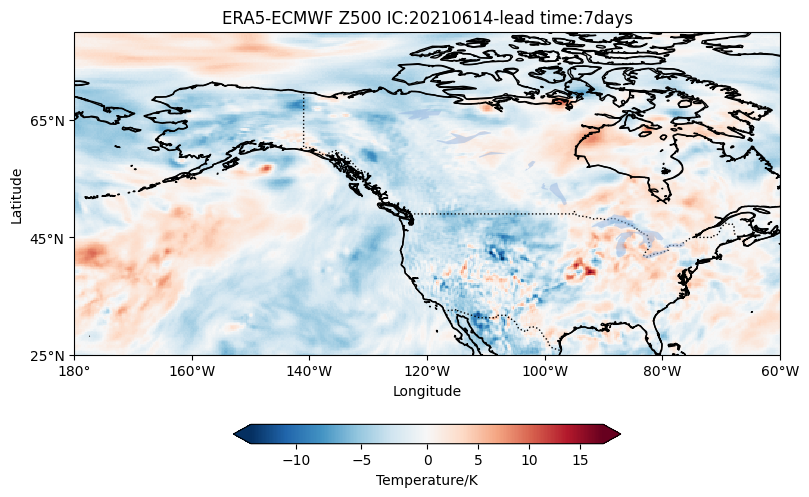

In [92]:

#differene plots 

# Set the CARTOPY_USER_BACKGROUNDS environment variable
#os.environ['CARTOPY_USER_BACKGROUNDS'] = '/home/kit/imk-tro/gj5173/'

# Assuming you have latitude ('lat'), longitude ('lon'), and temperature ('temperature') variables

# Create a figure and axis with Cartopy projection
fig3 = plt.figure(figsize=(10,6))
#proj = ccrs.PlateCarree(central_longitude=-120)
#ax1 = fig2.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
ax3 = plt.axes(projection=ccrs.PlateCarree())
#proj = ccrs.PlateCarree(central_longitude=-120) 

leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent

#f2_ax1 = fig.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
ax3.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
lon_ec = ds_ecmwf['longitude'][0:480]
lat_ec = ds_ecmwf['latitude'][0:220]
                  
# Add map features
ax3.add_feature(cfeature.COASTLINE)
ax3.add_feature(cfeature.BORDERS, linestyle=':')
ax3.add_feature(cfeature.LAND, facecolor='lightgray')
ax3.add_feature(cfeature.OCEAN, facecolor='w')


ax3.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax3.add_feature(cfeature.LAKES, alpha=0.5)
ax3.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
ax3.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())

lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()

ax3.xaxis.set_major_formatter(lon_formatter)
ax3.yaxis.set_major_formatter(lat_formatter)

# Plot the contour map
#contour = ax.contourf(lon,lat,ds_era.fields[676,2,260:40:-1,720:1200],cmap='jet',levels=20)
#phony_dim_4-lat phony_dim_5-lon phony_dim_0-leadtime(21) phony_dim_2-time 57(0:ground truth,intervel:6h,start from 2021.06.14 00UTC,) phony_dim_1-pertubated members phony_dim_3:variables
#assume time intervel in lead time is 3h
#lead time: 18 36 54 72
#time 2021.06.14-07.04UTC 00:00

#control forecast
#contour = ax3.contour(lon_ec,lat_ec,difference/9.80665, levels=20, colors='k', linewidths=0.5)
#plt.clabel(contour, inline=1, fontsize=9) 
contour3 = ax3.contourf(lon_ec,lat_ec,difference/9.80665,cmap='coolwarm',levels=20)
#ds_fcn_ecmwf.isel(phony_dim_0 = 1, phony_dim_1 = 1,phony_dim_2 = 2,phony_dim_3=slice(None,None,-1)).forecast.plot()
#control forecast

# Add colorbar
norm = mcolors.TwoSlopeNorm(vmin=difference.min()/9.80665, vcenter=0, vmax=difference.max()/9.80665)
pc = plt.pcolormesh(x,y,difference/9.80665, norm=norm, cmap="RdBu_r")
plt.colorbar(pc,orientation='horizontal',shrink=0.5,label='Temperature/K',extend='both')
#cbar = plt.colorbar(contour3, ax=ax3, label='Geopotential Height/gpm',orientation='horizontal',shrink=0.5)

# Set plot title and labels
#plt.title('Temperature Contour Map')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
#cbar = plt.colorbar(contour, ax=ax1, label='Temperature/K',orientation='horizontal',shrink=0.5)
plt.title('ERA5-ECMWF Z500 IC:20210614-lead time:7days')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

#plt.savefig('/home/kit/imk-tro/gj5173/z500_era5/Z500_2021-06-26_ECMWF.png', bbox_inches='tight',dpi=100)
# Show the plot
#plt.show